# Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

с помощью функции train_test_split так, чтобы размер тестовой выборки

составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
    
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.



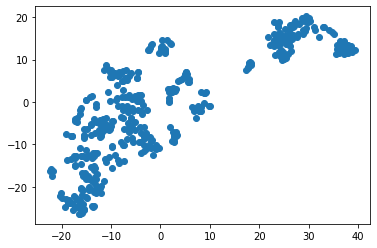

До:	(404, 13)
После:	(404, 2)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
b=load_boston()
X=pd.DataFrame(b.data, columns=b.feature_names)
y=pd.DataFrame(b.target, columns=['Price'])
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
s=StandardScaler()
X_train_scaled = pd.DataFrame(s.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(s.transform(X_test), columns=X_test.columns)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

# Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,

используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,

и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.



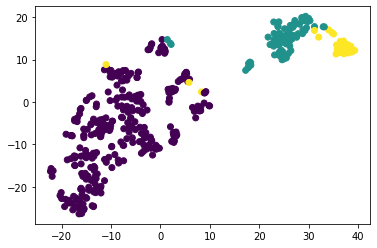

Кластер 0: Price    25.168687
dtype: float64
Кластер 1: Price    17.442105
dtype: float64
Кластер 2: Price    13.196774
dtype: float64
Кластер 0: 0.40486282828282844
Кластер 1: 11.745661842105266
Кластер 2: 14.360380322580648


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=100, max_iter=100)
labels_train = kmeans.fit_predict(X_train)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

print('Кластер 0: {}'.format(y_train.loc[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2].mean()))

print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


# Задание 3

Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


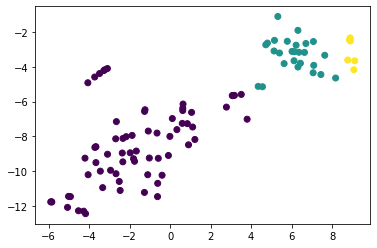

Кластер 0: Price    23.911594
dtype: float64
Кластер 1: Price    17.392308
dtype: float64
Кластер 2: Price    12.814286
dtype: float64
Кластер 0: 0.2464211594202899
Кластер 1: 8.469301923076923
Кластер 2: 19.021665714285714


In [22]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = kmeans.fit_predict(X_test)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

plt.show()

print('Кластер 0: {}'.format(y_test.loc[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2].mean()))

print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))